# Code to generate figure 2 part 2 for heatwaves for the paper

In [1]:
# setup all the imports
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import yaml
import urllib.request
import matplotlib.font_manager
flist = matplotlib.font_manager.get_font_names()
from tempfile import NamedTemporaryFile
import urllib
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LongitudeFormatter, LatitudeFormatter
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
import matplotlib.patches as patches
from extremeweatherbench import evaluate, utils, cases, defaults, inputs, metrics
sns.set_theme(style='whitegrid')
from shapely.geometry import Polygon
import shapely
from pathlib import Path
import multiprocessing

# make the basepath - change this to your local path
basepath = Path.home() / 'ExtremeWeatherBench' / ''
basepath = str(basepath) + '/'

In [2]:
# setup the templates to load in the data

# Forecast Examples
cira_heatwave_forecast_FOURv2 = inputs.KerchunkForecast(
    source="gs://extremeweatherbench/FOUR_v200_IFS.parq",
    variables=["surface_air_temperature"],
    variable_mapping={"t2": "surface_air_temperature"},
    storage_options={"remote_protocol": "s3", "remote_options": {"anon": True}},
    preprocess=defaults._preprocess_bb_cira_forecast_dataset,
)

cira_heatwave_forecast_GC = inputs.KerchunkForecast(
    source="gs://extremeweatherbench/GRAP_v100_IFS.parq",
    variables=["surface_air_temperature"],
    variable_mapping={"t2": "surface_air_temperature"},
    storage_options={"remote_protocol": "s3", "remote_options": {"anon": True}},
    preprocess=defaults._preprocess_bb_cira_forecast_dataset,
)

cira_heatwave_forecast_AURO = inputs.KerchunkForecast(
    source="gs://extremeweatherbench/AURO_v100_IFS.parq",
    variables=["surface_air_temperature"],
    variable_mapping={"t2": "surface_air_temperature"},
    storage_options={"remote_protocol": "s3", "remote_options": {"anon": True}},
    preprocess=defaults._preprocess_bb_cira_forecast_dataset,
)

cira_heatwave_forecast_PANG = inputs.KerchunkForecast(
    source="gs://extremeweatherbench/PANG_v100_IFS.parq",
    variables=["surface_air_temperature"],
    variable_mapping={"t2": "surface_air_temperature"},
    storage_options={"remote_protocol": "s3", "remote_options": {"anon": True}},
    preprocess=defaults._preprocess_bb_cira_forecast_dataset,
)

hres_forecast = inputs.ZarrForecast(
    source="gs://weatherbench2/datasets/hres/2016-2022-0012-1440x721.zarr",
    variables=["surface_air_temperature"],
    variable_mapping=inputs.HRES_metadata_variable_mapping,
    storage_options={"remote_options": {"anon": True}},
)


FOURv2_GHCN_EVALUATION_OBJECTS = [
    inputs.EvaluationObject(
        event_type="heat_wave",
        metric_list=[
            metrics.MaximumMAE,
            metrics.RMSE,
            metrics.OnsetME,
            metrics.DurationME,
            metrics.MaxMinMAE,
        ],
        target=defaults.ghcn_heatwave_target,
        forecast=cira_heatwave_forecast_FOURv2, 
    ),
]

FOURv2_ERA5_EVALUATION_OBJECTS = [
    inputs.EvaluationObject(
        event_type="heat_wave",
        metric_list=[
            metrics.MaximumMAE,
            metrics.RMSE,
            metrics.OnsetME,
            metrics.DurationME,
            metrics.MaxMinMAE,
        ],
        target=defaults.era5_heatwave_target,
        forecast=cira_heatwave_forecast_FOURv2, 
    ),
]

GC_GHCN_EVALUATION_OBJECTS = [
    inputs.EvaluationObject(
        event_type="heat_wave",
        metric_list=[
            metrics.MaximumMAE,
            metrics.RMSE,
            metrics.OnsetME,
            metrics.DurationME,
            metrics.MaxMinMAE,
        ],
        target=defaults.ghcn_heatwave_target,
        forecast=cira_heatwave_forecast_GC, 
    ),
]

GC_ERA5_EVALUATION_OBJECTS = [
    inputs.EvaluationObject(
        event_type="heat_wave",
        metric_list=[
            metrics.MaximumMAE,
            metrics.RMSE,
            metrics.OnsetME,
            metrics.DurationME,
            metrics.MaxMinMAE,
        ],
        target=defaults.era5_heatwave_target,
        forecast=cira_heatwave_forecast_GC, 
    ),
]

PANG_GHCN_EVALUATION_OBJECTS = [
    inputs.EvaluationObject(
        event_type="heat_wave",
        metric_list=[
            metrics.MaximumMAE,
            metrics.RMSE,
            metrics.OnsetME,
            metrics.DurationME,
            metrics.MaxMinMAE,
        ],
        target=defaults.ghcn_heatwave_target,
        forecast=cira_heatwave_forecast_PANG, 
    ),
]

PANG_ERA5_EVALUATION_OBJECTS = [
    inputs.EvaluationObject(
        event_type="heat_wave",
        metric_list=[
            metrics.MaximumMAE,
            metrics.RMSE,
            metrics.OnsetME,
            metrics.DurationME,
            metrics.MaxMinMAE,
        ],
        target=defaults.era5_heatwave_target,
        forecast=cira_heatwave_forecast_PANG, 
    ),
]

HRES_GHCN_EVALUATION_OBJECTS = [
    inputs.EvaluationObject(
        event_type="heat_wave",
        metric_list=[
            metrics.MaximumMAE,
            metrics.RMSE,
            metrics.OnsetME,
            metrics.DurationME,
            metrics.MaxMinMAE,
        ],
        target=defaults.ghcn_heatwave_target,
        forecast=hres_forecast,
    ),
]

HRES_ERA5_EVALUATION_OBJECTS = [
    inputs.EvaluationObject(
        event_type="heat_wave",
        metric_list=[
            metrics.MaximumMAE,
            metrics.RMSE,
            metrics.OnsetME,
            metrics.DurationME,
            metrics.MaxMinMAE,
        ],
        target=defaults.era5_heatwave_target,
        forecast=hres_forecast,
    ),
]

In [3]:
# load in all of the events in the yaml file
case_dict = utils.load_events_yaml()
heat_test = {"cases": case_dict["cases"]}

ewb_fourv2_ghcn = evaluate.ExtremeWeatherBench(heat_test, FOURv2_GHCN_EVALUATION_OBJECTS)
ewb_fourv2_era5 = evaluate.ExtremeWeatherBench(heat_test, FOURv2_ERA5_EVALUATION_OBJECTS)

ewb_gc_ghcn = evaluate.ExtremeWeatherBench(heat_test, GC_GHCN_EVALUATION_OBJECTS)
ewb_gc_era5 = evaluate.ExtremeWeatherBench(heat_test, GC_ERA5_EVALUATION_OBJECTS)

ewb_pang_ghcn = evaluate.ExtremeWeatherBench(heat_test, PANG_GHCN_EVALUATION_OBJECTS)
ewb_pang_era5 = evaluate.ExtremeWeatherBench(heat_test, PANG_ERA5_EVALUATION_OBJECTS)

ewb_hres_ghcn = evaluate.ExtremeWeatherBench(heat_test, HRES_GHCN_EVALUATION_OBJECTS)
ewb_hres_era5 = evaluate.ExtremeWeatherBench(heat_test, HRES_ERA5_EVALUATION_OBJECTS)

This function is deprecated and will be removed in a future release. Please use cases.load_ewb_events_yaml_into_case_collection instead.
This function is deprecated and will be removed in a future release. Please use cases.read_incoming_yaml instead.


In [5]:
# load in the results for all heat waves in parallel
# this will take awhile to run if you do them all in one code box 
n_threads_per_process = 4
n_processes = max(1, multiprocessing.cpu_count() // n_threads_per_process)

fourv2_ghcn_results = ewb_fourv2_ghcn.run(parallel=True, n_jobs=n_processes, pre_compute=True)
fourv2_era5_results = ewb_fourv2_era5.run(parallel=True, n_jobs=n_processes, pre_compute=True)

# gc_ghcn_results = ewb_gc_ghcn.run(parallel=True, n_jobs=n_processes, pre_compute=True)
# gc_era5_results = ewb_gc_era5.run(parallel=True, n_jobs=n_processes, pre_compute=True)

pang_ghcn_results = ewb_pang_ghcn.run(parallel=True, n_jobs=n_processes, pre_compute=True)
pang_era5_results = ewb_pang_era5.run(parallel=True, n_jobs=n_processes, pre_compute=True)

hres_ghcn_results = ewb_hres_ghcn.run(parallel=True, n_jobs=n_processes, pre_compute=True)
hres_era5_results = ewb_hres_era5.run(parallel=True, n_jobs=n_processes, pre_compute=True)

  0%|          | 0/46 [00:00<?, ?it/s]

Forecast dataset for case 1 has no data for case time range 2021-06-20 00:00:00 to 2021-07-03 00:00:00.
Forecast dataset for case 18 has no data for case time range 2021-06-18 00:00:00 to 2021-06-30 00:00:00.
Forecast dataset for case 27 has no data for case time range 2021-05-30 00:00:00 to 2021-06-09 00:00:00.
Forecast dataset for case 28 has no data for case time range 2021-01-12 18:00:00 to 2021-01-18 18:00:00.
Forecast dataset for case 29 has no data for case time range 2020-11-25 00:00:00 to 2020-12-01 00:00:00.
/home/amy/ExtremeWeatherBench/.venv/lib/python3.13/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/home/amy/ExtremeWeatherBench/.venv/lib/python3.13/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be cause

  0%|          | 0/46 [00:00<?, ?it/s]

/home/amy/ExtremeWeatherBench/.venv/lib/python3.13/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
Forecast dataset for case 1 has no data for case time range 2021-06-20 00:00:00 to 2021-07-03 00:00:00.
Forecast dataset for case 18 has no data for case time range 2021-06-18 00:00:00 to 2021-06-30 00:00:00.
/home/amy/ExtremeWeatherBench/.venv/lib/python3.13/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/home/amy/ExtremeWeatherBench/.venv/lib/python3.13/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a me

  0%|          | 0/46 [00:00<?, ?it/s]

Forecast dataset for case 1 has no data for case time range 2021-06-20 00:00:00 to 2021-07-03 00:00:00.
/home/amy/ExtremeWeatherBench/.venv/lib/python3.13/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/home/amy/ExtremeWeatherBench/.venv/lib/python3.13/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
Forecast dataset for case 18 has no data for case time range 2021-06-18 00:00:00 to 2021-06-30 00:00:00.
/home/amy/ExtremeWeatherBench/.venv/lib/python3.13/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a me

  0%|          | 0/46 [00:00<?, ?it/s]

/home/amy/ExtremeWeatherBench/.venv/lib/python3.13/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
Forecast dataset for case 1 has no data for case time range 2021-06-20 00:00:00 to 2021-07-03 00:00:00.
/home/amy/ExtremeWeatherBench/.venv/lib/python3.13/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
Forecast dataset for case 18 has no data for case time range 2021-06-18 00:00:00 to 2021-06-30 00:00:00.
/home/amy/ExtremeWeatherBench/.venv/lib/python3.13/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a me

  0%|          | 0/46 [00:00<?, ?it/s]

Forecast dataset for case 7 has no data for case time range 2023-11-18 00:00:00 to 2023-11-28 00:00:00.
/home/amy/ExtremeWeatherBench/.venv/lib/python3.13/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
Forecast dataset for case 10 has no data for case time range 2023-08-17 00:00:00 to 2023-08-28 00:00:00.
Forecast dataset for case 8 has no data for case time range 2023-09-02 00:00:00 to 2023-09-13 00:00:00.
Forecast dataset for case 5 has no data for case time range 2023-05-10 00:00:00 to 2023-05-23 00:00:00.
Forecast dataset for case 9 has no data for case time range 2023-07-07 00:00:00 to 2023-07-27 00:00:00.
/home/amy/ExtremeWeatherBench/.venv/lib/python3.13/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused b

  0%|          | 0/46 [00:00<?, ?it/s]

/home/amy/ExtremeWeatherBench/.venv/lib/python3.13/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
Forecast dataset for case 5 has no data for case time range 2023-05-10 00:00:00 to 2023-05-23 00:00:00.
Forecast dataset for case 12 has no data for case time range 2023-05-24 00:00:00 to 2023-06-01 00:00:00.
Forecast dataset for case 13 has no data for case time range 2023-04-14 00:00:00 to 2023-04-23 00:00:00.
Forecast dataset for case 11 has no data for case time range 2023-07-29 00:00:00 to 2023-08-04 00:00:00.
Forecast dataset for case 15 has no data for case time range 2023-04-22 00:00:00 to 2023-05-01 00:00:00.
Forecast dataset for case 7 has no data for case time range 2023-11-18 00:00:00 to 2023-11-28 00:00:00.
Forecast dataset for case 10 has no data for case time range 2023-08-17 00:00:00 to 2023-08-28 00:0

In [6]:
# save the results so I don't have to keep re-running
fourv2_ghcn_results.to_pickle(basepath + 'docs/notebooks/figure2_part2_fourv2_ghcn_results.pkl')
fourv2_era5_results.to_pickle(basepath + 'docs/notebooks/figure2_part2_fourv2_era5_results.pkl')

pang_ghcn_results.to_pickle(basepath + 'docs/notebooks/figure2_part2_pang_ghcn_results.pkl')
pang_era5_results.to_pickle(basepath + 'docs/notebooks/figure2_part2_pang_era5_results.pkl')

hres_ghcn_results.to_pickle(basepath + 'docs/notebooks/figure2_part2_hres_ghcn_results.pkl')
hres_era5_results.to_pickle(basepath + 'docs/notebooks/figure2_part2_hres_era5_results.pkl')

In [4]:
# load the results back in
fourv2_ghcn_results = pd.read_pickle(basepath + 'docs/notebooks/figure2_part2_fourv2_ghcn_results.pkl')
fourv2_era5_results = pd.read_pickle(basepath + 'docs/notebooks/figure2_part2_fourv2_era5_results.pkl')

pang_ghcn_results = pd.read_pickle(basepath + 'docs/notebooks/figure2_part2_pang_ghcn_results.pkl')
pang_era5_results = pd.read_pickle(basepath + 'docs/notebooks/figure2_part2_pang_era5_results.pkl')

hres_ghcn_results = pd.read_pickle(basepath + 'docs/notebooks/figure2_part2_hres_ghcn_results.pkl')
hres_era5_results = pd.read_pickle(basepath + 'docs/notebooks/figure2_part2_hres_era5_results.pkl')

In [9]:
fourv2_ghcn_results


,value,lead_time,init_time,target_variable,metric,case_id_number,event_type
0,1.832287,0 days 00:00:00,NaN,surface_air_temperature,maximum_mae,2,heat_wave
1,0.183208,0 days 06:00:00,NaN,surface_air_temperature,maximum_mae,2,heat_wave
2,1.034923,0 days 12:00:00,NaN,surface_air_temperature,maximum_mae,2,heat_wave
3,0.336864,0 days 18:00:00,NaN,surface_air_temperature,maximum_mae,2,heat_wave
4,0.927959,1 days 00:00:00,NaN,surface_air_temperature,maximum_mae,2,heat_wave
...,...,...,...,...,...,...,...
7585,NaN,9 days 00:00:00,NaN,surface_air_temperature,max_min_mae,88,heat_wave
7586,NaN,9 days 06:00:00,NaN,surface_air_temperature,max_min_mae,88,heat_wave
7587,NaN,9 days 12:00:00,NaN,surface_air_temperature,max_min_mae,88,heat_wave
7588,NaN,9 days 18:00:00,NaN,surface_air_temperature,max_min_mae,88,heat_wave


In [5]:
# group the results by metric and lead time
fourv2_ghcn_group = fourv2_ghcn_results[['metric', 'lead_time', 'value']].groupby(['metric', 'lead_time']).mean()
fourv2_ghcn_group = fourv2_ghcn_group.reset_index()

fourv2_era5_group = fourv2_era5_results[['metric', 'lead_time', 'value']].groupby(['metric', 'lead_time']).mean()
fourv2_era5_group = fourv2_era5_group.reset_index()

# gc_ghcn_group = gc_ghcn_results[['metric', 'lead_time', 'value']].groupby(['metric', 'lead_time']).mean()
# gc_ghcn_group = gc_ghcn_group.reset_index()

# gc_era5_group = gc_era5_results[['metric', 'lead_time', 'value']].groupby(['metric', 'lead_time']).mean()
# gc_era5_group = gc_era5_group.reset_index()

pang_ghcn_group = pang_ghcn_results[['metric', 'lead_time', 'value']].groupby(['metric', 'lead_time']).mean()
pang_ghcn_group = pang_ghcn_group.reset_index()

pang_era5_group = pang_era5_results[['metric', 'lead_time', 'value']].groupby(['metric', 'lead_time']).mean()
pang_era5_group = pang_era5_group.reset_index()

hres_ghcn_group = hres_ghcn_results[['metric', 'lead_time', 'value']].groupby(['metric', 'lead_time']).mean()
hres_ghcn_group = hres_ghcn_group.reset_index()

hres_era5_group = hres_era5_results[['metric', 'lead_time', 'value']].groupby(['metric', 'lead_time']).mean()
hres_era5_group = hres_era5_group.reset_index()



In [ ]:
fourv2_ghcn_group[fourv2_ghcn_group['metric'] == 'MaximumMAE']['value'].values

array([3.0742371959377985, 3.4071349106547815, 3.707120340746384,
       3.887300991421245, 3.4236525616964557, 4.027552379049048,
       3.675866011646709, 3.9845270598798406, 3.8760853573634355,
       4.043867433696183, 3.6174999819546416, 4.12997278037587,
       3.7781693530938134, 4.341073040792537, 3.965430100502177,
       4.564128199135171, 4.291281186076305, 4.7961119289063765,
       4.223108890927324, 4.743217699925721, 4.217907418134809,
       4.818832992429442, 4.362876988742062, 4.990545958621778,
       4.631572199043661, 5.160147124333543, 4.6920311498093525,
       5.275629547721481, 4.957966778372817, 5.612110276537784,
       5.383438674269322, 5.6733804022136685, 5.375575030774712,
       5.969693733454368, 5.774654863631604, 6.233282048419025,
       5.935528631573101, 6.292113399562998, 6.264601666706156,
       6.409013937447423, 6.349828320049179], dtype=object)

In [18]:
def plot_results_by_metric(metric='rmse', filename=None, title='RMSE for All Heat Waves'):
    # make the pivot table so we can plot by lead time
    fourv2_ghcn_pivot = fourv2_ghcn_group[fourv2_ghcn_group['metric']==metric].pivot(index='metric', columns='lead_time', values='value')
    fourv2_era_pivot = fourv2_era5_group[fourv2_era5_group['metric']==metric].pivot(index='metric', columns='lead_time', values='value')

    pang_ghcn_pivot = pang_ghcn_group[pang_ghcn_group['metric']==metric].pivot(index='metric', columns='lead_time', values='value')
    pang_era5_pivot = pang_era5_group[pang_era5_group['metric']==metric].pivot(index='metric', columns='lead_time', values='value')

    hres_ghcn_pivot = hres_ghcn_group[hres_ghcn_group['metric']==metric].pivot(index='metric', columns='lead_time', values='value')
    hres_era5_pivot = hres_era5_group[hres_era5_group['metric']==metric].pivot(index='metric', columns='lead_time', values='value')

    # make the plots
    sns.set_theme(style='whitegrid')
    fig, ax = plt.subplots(figsize=(16,4))
    fourv2_ghcn_values = fourv2_ghcn_pivot.loc[metric].values
    fourv2_era5_values = fourv2_era_pivot.loc[metric].values
    pang_ghcn_values = pang_ghcn_pivot.loc[metric].values
    pang_era5_values = pang_era5_pivot.loc[metric].values
    hres_ghcn_values = hres_ghcn_pivot.loc[metric].values
    hres_era5_values = hres_era5_pivot.loc[metric].values

    plt.plot(np.flip(fourv2_ghcn_values), 'r', label='FourCastNet V2 GHCN')
    plt.plot(np.flip(fourv2_era5_values), 'r.-', label='FourCastNet V2 ERA5')

    plt.plot(np.flip(pang_ghcn_values), 'g', label='Pangu Weather GHCN')
    plt.plot(np.flip(pang_era5_values), 'g.-', label='Pangu Weather ERA5')  

    plt.plot(np.flip(hres_ghcn_values), 'm', label='HRES GHCN')
    plt.plot(np.flip(hres_era5_values), 'm.-', label='HRES ERA5')

    # make the xticklabels more readable and show every other one
    # print(np.arange(0, len(merged_pivot.columns), 2))
    # print(merged_pivot.columns[::2])
    ax.set_xticks(rotation=90, labels=np.flip(fourv2_ghcn_pivot.columns[::2]), ticks=np.arange(-0, len(fourv2_ghcn_pivot.columns), 2))
    #ax.set_xticks(ticks=np.arange(0, len(merged_pivot.columns), 2))

    ax.set_ylabel('Celsius')
    ax.set_xlabel('Initialization Time')
    plt.title(title)
    #ax.grid(True, which='both', axis='both', color='lightgrey', linestyle='--', linewidth=0.5)
    plt.legend()

    if (filename is not None):
        plt.savefig(filename, bbox_inches='tight', dpi=300)


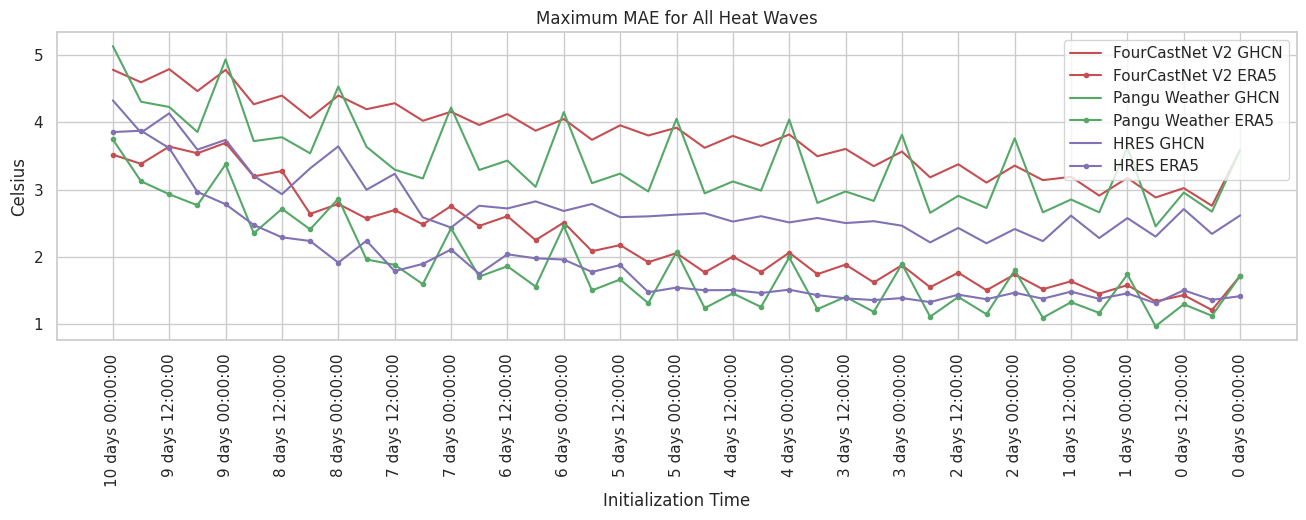

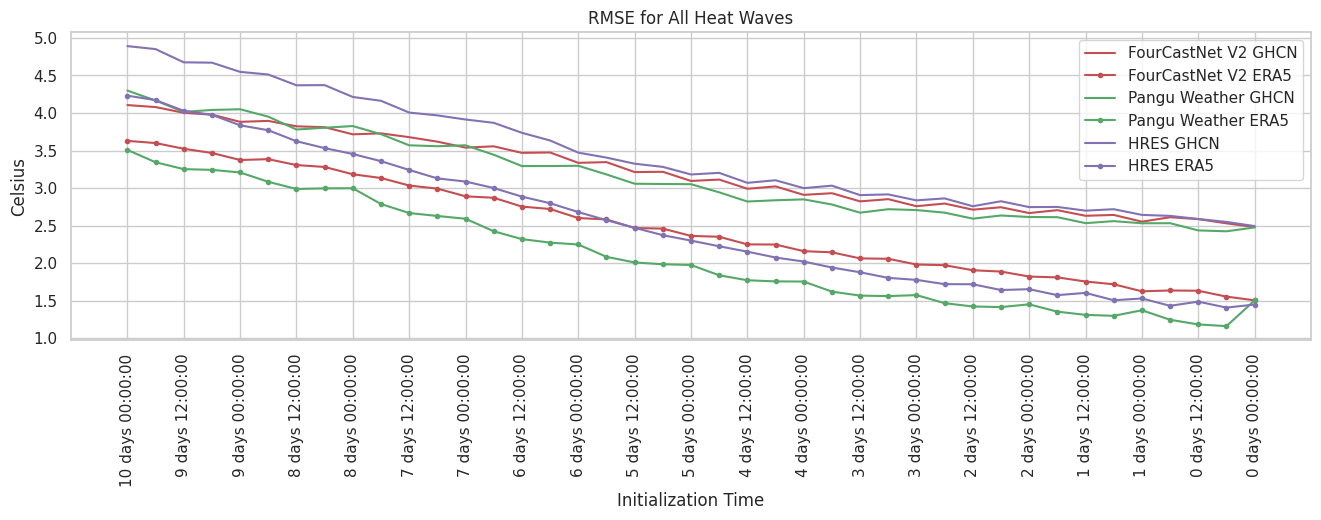

In [19]:
plot_results_by_metric(metric='maximum_mae', filename=basepath + 'docs/notebooks/figure2_part2_maximum_mae.png', title='Maximum MAE for All Heat Waves')
plot_results_by_metric(metric='rmse', filename=basepath + 'docs/notebooks/figure2_part2_rmse.png', title='RMSE for All Heat Waves')
